In [1]:
import os
from copy import copy
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
pattern_date = '2023-12-24'
root_dir = f'{"/".join(os.getcwd().split("/")[:-1])}'
pose_output_dir = f'{root_dir}/data/outputs/02.pose_estimation'
helmet_detection_dir = f'{root_dir}/data/outputs/03.helmet_detection/00.head_detection_add_label'

In [3]:
pred_head_df = pd.read_csv(f'{helmet_detection_dir}/head_eval_pred_add_label-{pattern_date}.csv')

In [4]:
pred_head_unknown_small = copy(
    pred_head_df[
        (pred_head_df['label'] == 'helmet unknown (small)') & 
        (
            (pred_head_df['unique_key'].str.contains('fixed-point-camera')) | 
            (pred_head_df['unique_key'].str.contains('for-learning/2023-11-19-omaezaki-500')) | 
            (pred_head_df['unique_key'].str.contains('for-learning/2023-11-23-mie-safetybelt'))
        )
    ]
)
pred_head_unknown_small['bbox_width'] = pred_head_unknown_small['right'] - pred_head_unknown_small['left']
pred_head_unknown_small['bbox_height'] = pred_head_unknown_small['bottom'] - pred_head_unknown_small['top']

In [5]:
pred_head_not_unknown_small = copy(
    pred_head_df[
        (pred_head_df['label'] != 'helmet unknown (small)') & 
        (
            (pred_head_df['unique_key'].str.contains('fixed-point-camera')) | 
            (pred_head_df['unique_key'].str.contains('for-learning/2023-11-19-omaezaki-500')) | 
            (pred_head_df['unique_key'].str.contains('for-learning/2023-11-23-mie-safetybelt'))
        )
    ]
)
pred_head_not_unknown_small['bbox_width'] = pred_head_not_unknown_small['right'] - pred_head_not_unknown_small['left']
pred_head_not_unknown_small['bbox_height'] = pred_head_not_unknown_small['bottom'] - pred_head_not_unknown_small['top']

In [6]:
def visualize_two_histgram(data1, data2, range, xlabel, ylabel='ratio', label1='unknown_small', label2='not_unknown_small', title='histgram - unknown_small vs not_unknown_small'):
    bins = int((range[1] - range[0]) / 10)
    hist1, bins1 = np.histogram(data1, bins=bins, density=True, range=range)
    hist2,  bins2 = np.histogram(data2, bins=bins, density=True, range=range)
    
    # FigureとAxesを作成
    fig, ax = plt.subplots()

    # ヒストグラムを描画
    width = bins1[1] - bins1[0]
    center = (bins1[:-1] + bins1[1:]) / 2
    ax.bar(center, hist1, align='center', width=width, color='blue', alpha=0.7, label=label1)
    ax.bar(center, hist2, align='center', width=width, color='red', alpha=0.7, label=label2)
    
    ax.set_xlabel(xlabel)  # x軸ラベルを設定
    ax.set_ylabel(ylabel)  # y軸ラベルを設定
    ax.set_title(title)  # グラフのタイトルを設定
    ax.grid(True)  # グリッドを表示
    ax.legend(loc='upper right')
    
    fig.set_size_inches(12, 6)
    plt.show()

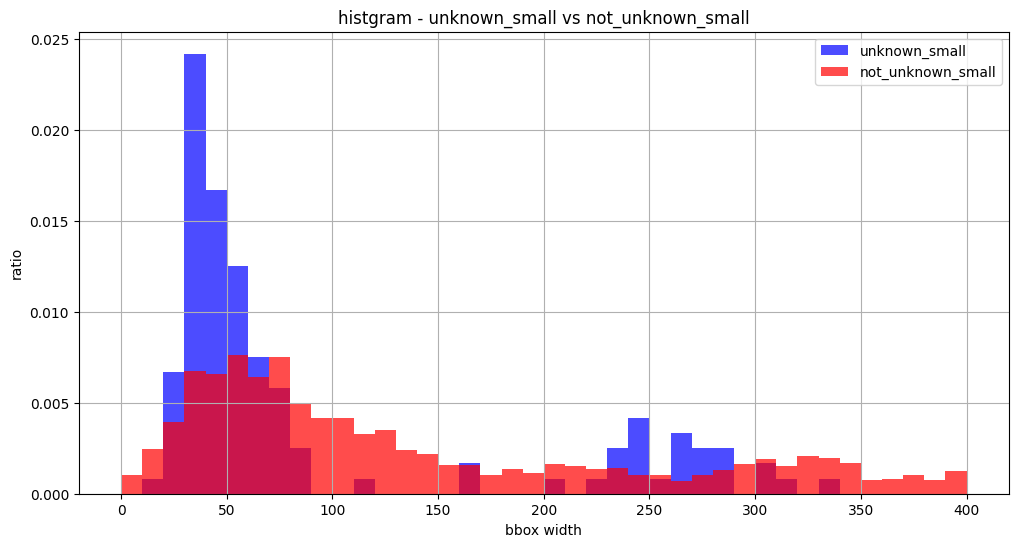

In [7]:
visualize_two_histgram(
    pred_head_unknown_small['bbox_width'],
    pred_head_not_unknown_small['bbox_width'],
    range=(0, 400),
    xlabel='bbox width'
)

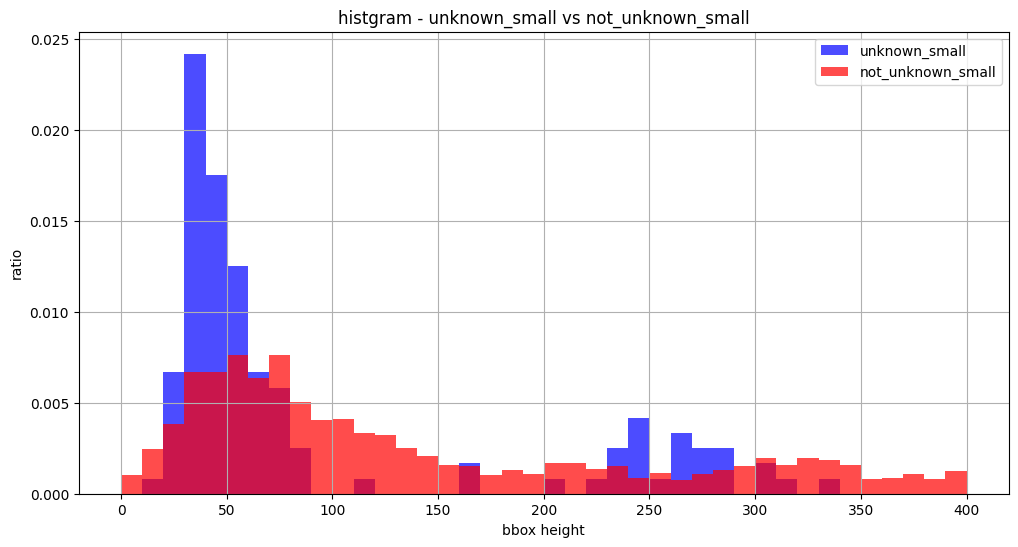

In [8]:
visualize_two_histgram(
    pred_head_unknown_small['bbox_height'],
    pred_head_not_unknown_small['bbox_height'],
    range=(0, 400),
    xlabel='bbox height'
)

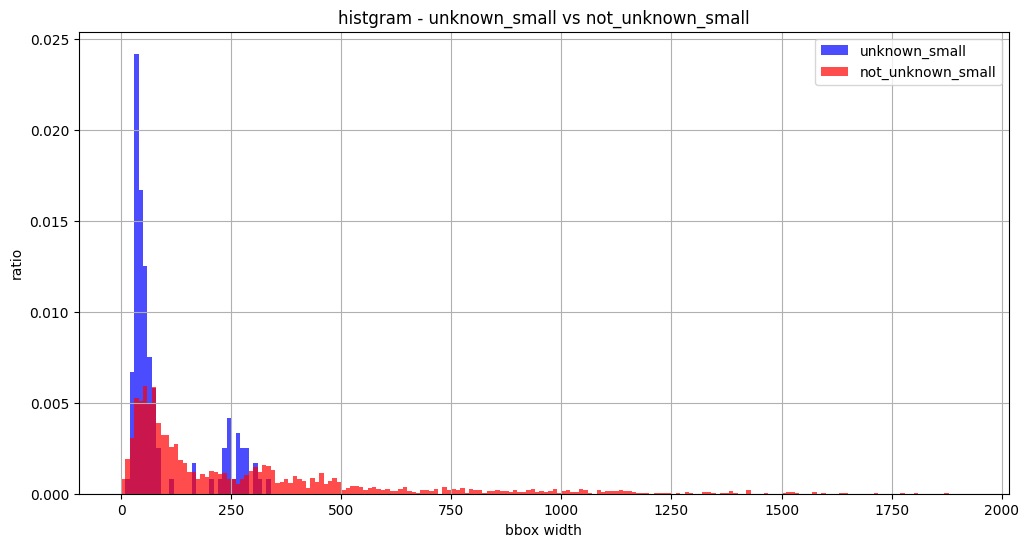

In [9]:
visualize_two_histgram(
    pred_head_unknown_small['bbox_width'],
    pred_head_not_unknown_small['bbox_width'],
    range=(0, 1920),
    xlabel='bbox width'
)

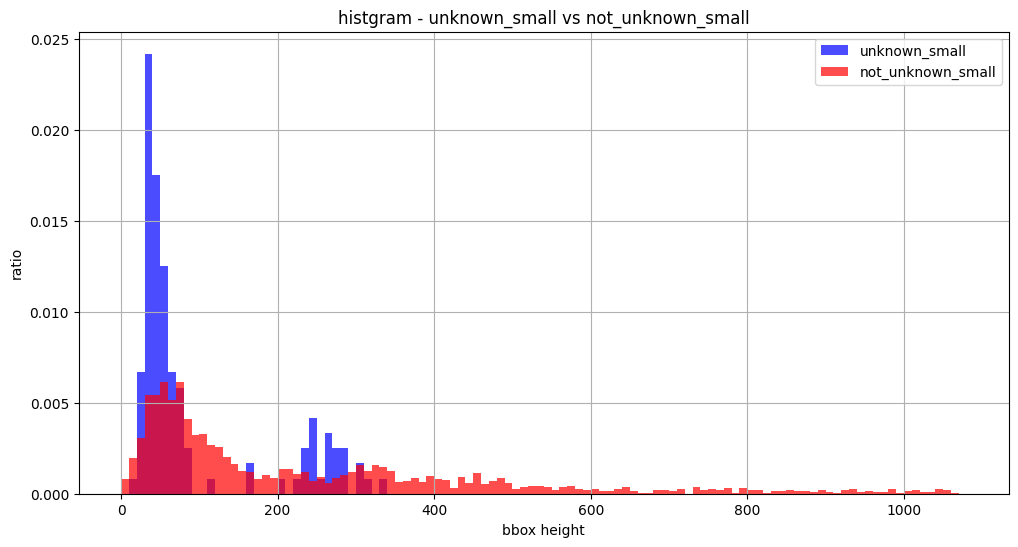

In [10]:
visualize_two_histgram(
    pred_head_unknown_small['bbox_height'],
    pred_head_not_unknown_small['bbox_height'],
    range=(0, 1080),
    xlabel='bbox height'
)